# SHAP 값을 이용해서 머신러닝의 예측 근거 확인하기

(출처: [Medium](https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137))

머신러닝 모델은 종종 해석이 어려운 블랙박스처럼 작동합니다. 모델의 출력을 주로 결정하는 주요 특징을 이해하기 위해서는 이러한 측면을 설명할 수 있는 설명 가능한 머신러닝 기법이 필요합니다. 그 중 하나가 SHAP 방법입니다. 이 방법은 각 특징이 모델에 미치는 영향을 설명하고, 데이터셋과 문제에 대한 지역적 및 전역적 분석을 가능하게 합니다.

SHAP 값(**SH**apley **A**dditive ex**P**lanations)은 협력 게임 이론에 기반한 방법으로, 머신러닝 모델의 투명성과 해석 가능성을 높이는 데 사용됩니다. 아래의 워터폴 차트는 각 feature가 예측 값에 어느 정도 영향을 미치는지 보여줍니다.

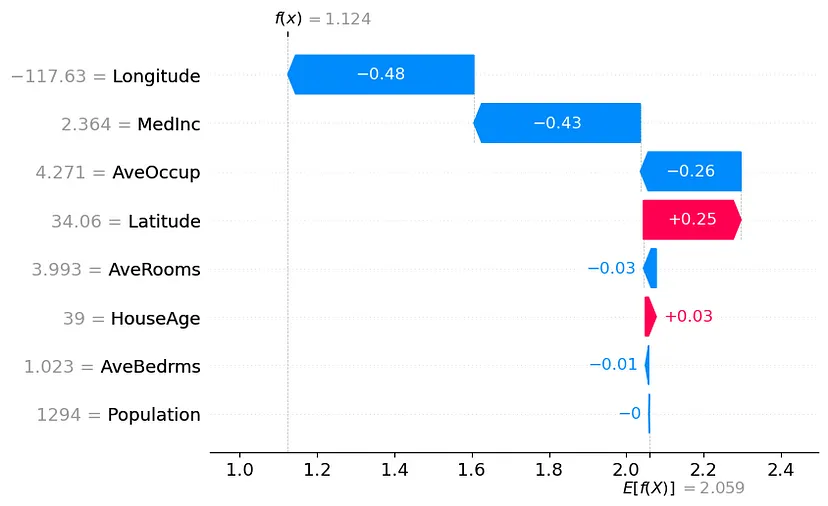

In [ ]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 캘리포니아 집 값 데이터
# dataset = fetch_california_housing(as_frame = True)
dataset = pd.read_csv('california_housing.csv')
X = dataset.drop(['Unnamed: 0', 'SalesPrice'], axis=1)
y = dataset['SalesPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 랜덤 포레스트를 활용한 회귀
model = RandomForestRegressor()

# 모델 훈련
model.fit(X_train, y_train)

In [ ]:
X.shape

모델의 SHAP 값을 계산하기 위해서는 Explainer 객체를 생성하고 이를 사용하여 샘플 또는 전체 데이터셋을 평가해야 합니다.

In [ ]:
# 데이터 양이 많아 시간이 오래 걸릴 수 있기 때문에 테스트 데이터의 일부만 활용합니다
X_test_sample = X_test.sample(n=100)

# Explainer 객체 생성
explainer = shap.Explainer(model.predict, X_test_sample)

# SHAP 값 계산
shap_values = explainer(X_test_sample)

### 시각화를 통한 탐색

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.initjs()
tree_explainer = shap.TreeExplainer(model)
shap.force_plot(
    tree_explainer.expected_value,
    tree_explainer.shap_values(X_test_sample), 
    feature_names=X.columns
)

In [ ]:
shap.plots.waterfall(shap_values[0])